In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
# 1.print first five lines of dataset
df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
# 2. Check column data types

df.dtypes

TV       float64
Sales    float64
dtype: object

In [6]:
# 3. Check the shape of the Data Frame (rows, columns)

df.shape

(200, 2)

In [7]:
# 4. Look at summary statistics

df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


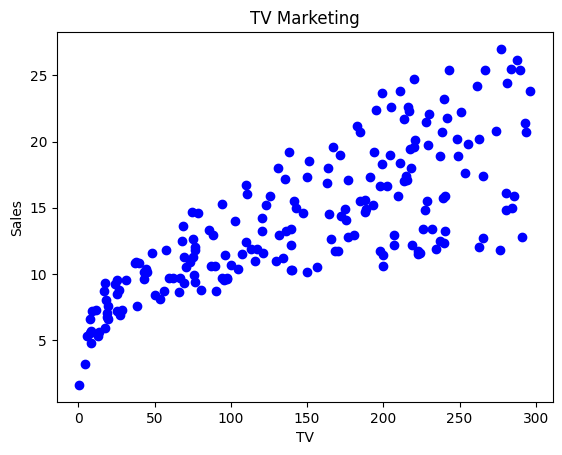

In [8]:
# 5. Visualize the relationship between the features and the dependent variabl using scatterplots

x = df.drop(columns=('Sales'))
y = df['Sales']
plt.scatter(x,y,color = 'blue')
plt.title('TV Marketing')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

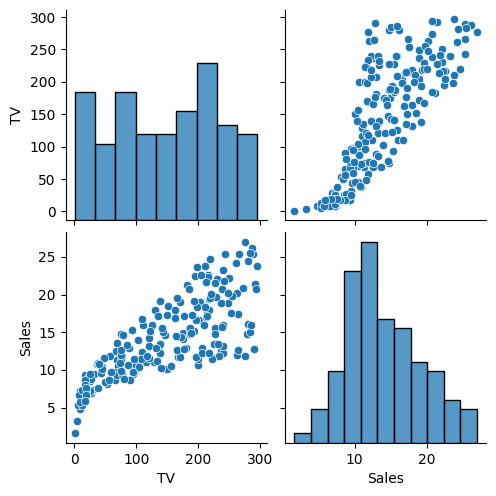

In [9]:
sns.pairplot(df)

In [10]:
# 6. Prepare X (feature variables) and y (response variable)
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test

from sklearn.model_selection import train_test_split
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# 8. Print the shape of train data and test data

print("Trained data")
print(X_train.shape)
print(X_test.shape)

print("Test data")
print(y_train.shape)
print(y_test.shape)

Trained data
(140, 1)
(60, 1)
Test data
(140,)
(60,)


In [12]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

# Step 1: Compute necessary sums
n = len(X_train)
sum_x = X_train.iloc[:,0].sum()
sum_y = y_train.sum()
sum_xy = (X_train.iloc[:,0] * y_train).sum()
sum_x2 = (X_train.iloc[:,0] ** 2).sum()

# Step 2: Compute slope (β1)
beta_1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

# Step 3: Compute intercept (β0)
beta_0 = (sum_y - beta_1 * sum_x) / n

# Print the coefficients
print("Intercept (β0):", beta_0)
print("Slope (β1):", beta_1)


Intercept (β0): 7.23945983075114
Slope (β1): 0.04640780212815275


In [ ]:
# 10.Create the model using the calculated coefficients and make predictions on the testing se

beta_0 = 7.239459830751138
beta_1 = 0.04640780212815275

y_pred = beta_0 + beta_1 * X_test.iloc[:, 0]

y_pred

95     14.817854
15     16.307544
30     20.832305
158     7.782431
128    17.463099
115    10.724686
69     17.300671
170     9.559850
174    17.560555
45     15.365466
66      8.701306
182     9.847578
165    18.122089
78      7.490062
186    13.713348
177    15.138068
56      7.578237
152    16.409642
82     10.733967
68     18.256672
124    17.890050
16     10.385909
148     9.002956
93     18.883177
65     10.441598
60      9.722277
84     17.147526
67     13.704067
125    11.286220
132     7.629285
9      16.511739
18     10.450880
55     16.469972
75      8.023752
150    20.266130
104    18.293798
135     9.480957
137    19.941275
164    12.678454
76      8.515674
79     12.622765
197    15.453641
38      9.239636
24     10.130666
122    17.634808
195     9.012238
29     10.515851
19     14.075329
143    12.093716
86     10.780375
114    10.868550
173    15.054534
5       7.643208
126     7.601441
117    10.785016
73     13.244629
140    10.645793
98     20.683800
172     8.1490

In [ ]:
# 11.Perform Linear Regression using library(sklearn)

from sklearn.linear_model import LinearRegression

X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

# Print the coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_)
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    print("X_test : ", X_test.iloc[i], "Predicted : ", y_pred[i])

Intercept (β0): 7.239459830751138
Slope (β1): [0.0464078]
X_test :  TV    163.3
Name: 95, dtype: float64 Predicted :  14.817853918278484
X_test :  TV    195.4
Name: 15, dtype: float64 Predicted :  16.30754436659219
X_test :  TV    292.9
Name: 30, dtype: float64 Predicted :  20.83230507408708
X_test :  TV    11.7
Name: 158, dtype: float64 Predicted :  7.7824311156505255
X_test :  TV    220.3
Name: 128, dtype: float64 Predicted :  17.463098639583194
X_test :  TV    75.1
Name: 115, dtype: float64 Predicted :  10.72468577057541
X_test :  TV    216.8
Name: 69, dtype: float64 Predicted :  17.30067133213466
X_test :  TV    50.0
Name: 170, dtype: float64 Predicted :  9.559849937158777
X_test :  TV    222.4
Name: 174, dtype: float64 Predicted :  17.560555024052313
X_test :  TV    175.1
Name: 45, dtype: float64 Predicted :  15.365465983390688
X_test :  TV    31.5
Name: 66, dtype: float64 Predicted :  8.70130559778795
X_test :  TV    56.2
Name: 182, dtype: float64 Predicted :  9.847578310353324
X

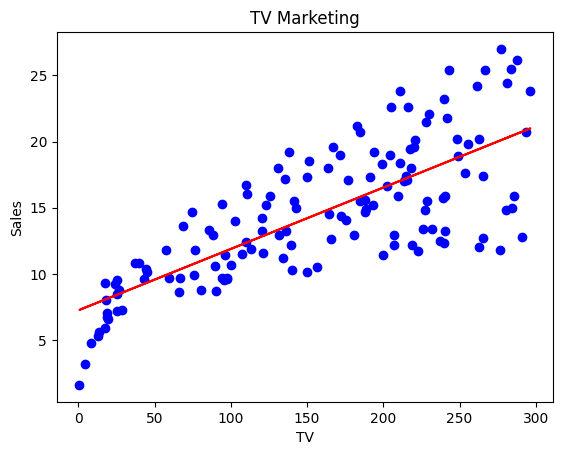

In [ ]:
# 14.Plot train data and the model

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')

plt.title('TV Marketing')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

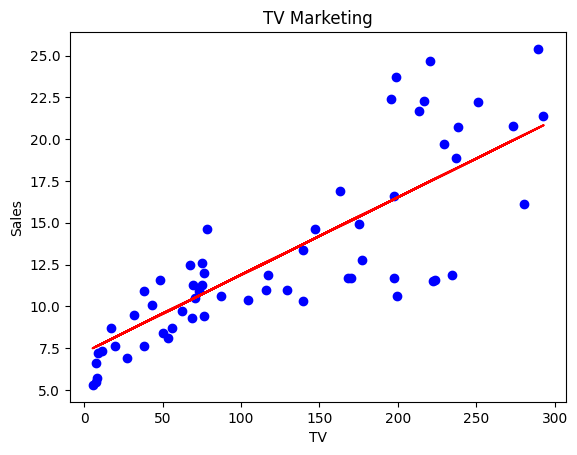

In [ ]:
# 15.Plot test data and the model

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.predict(X_test), color='red')

plt.title('TV Marketing')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
# 16.Print Mean Squared Error and R Squared Value

from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

r2 = r2_score(y_test, y_pred)

print("R-squared Score: ", r2)

Mean Squared Error:  8.970991242413614
R-squared Score:  0.6714477229302764


In [ ]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library

n = len(y_train)

ss_error = (y_train - model.predict(X_train)) ** 2
summation = ss_error.sum() / n
print("SSE : ", summation)


SS = (y_train - y_train.mean()) ** 2
TSS = SS.sum() / n
r2 = 1 - summation / TSS
print("R Squared(TSS) : ", r2)


SSE :  11.189103289351676
R Squared(TSS) :  0.5736021199591975
